In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file_path):
    try:
        # Chargement des données avec gestion des lignes problématiques
        data = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
        return data
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

# Charger les données
data_path = r'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text_lang_detector.csv'
data = load_data(data_path)
data.head() if data is not None else print("Failed to load data.")

,sentence,is_not_french
0,Y a -t -il un moyen d 'aller de Montreux -Vieu...,0
1,I would like to travel from culoz to buswiller...,1
2,He lied when he said he didn 't like her .,1
3,?N |ajOLIY6 ;DOM 'mKavLZZnkAi,0
4,a (c }sMyu7 /97 . [ -IA @m k0rN0U,0


In [3]:
def preprocess_data(data):
    try:
        # Renommer les colonnes pour simplifier les analyses
        data.columns = ['sentence', 'is_not_french']
        
        # Convertir la colonne 'is_not_french' en type int si ce n'est pas déjà fait
        data['is_not_french'] = data['is_not_french'].astype(int)
        
        # Ajouter une colonne pour identifier la langue basée sur 'is_not_french'
        data['language'] = data['is_not_french'].apply(lambda x: 'Not French' if x == 1 else 'French')
        
        return data
    except Exception as e:
        print(f"Error processing the data: {e}")
        return None

# Prétraitement des données
if data is not None:
    data = preprocess_data(data)
    data.head()

C:\Users\vikne\AppData\Local\Temp\ipykernel_9748\48256759.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=data, palette='muted')


Répartition des Langues dans le Dataset:
French: 916033 phrases
Not French: 385712 phrases


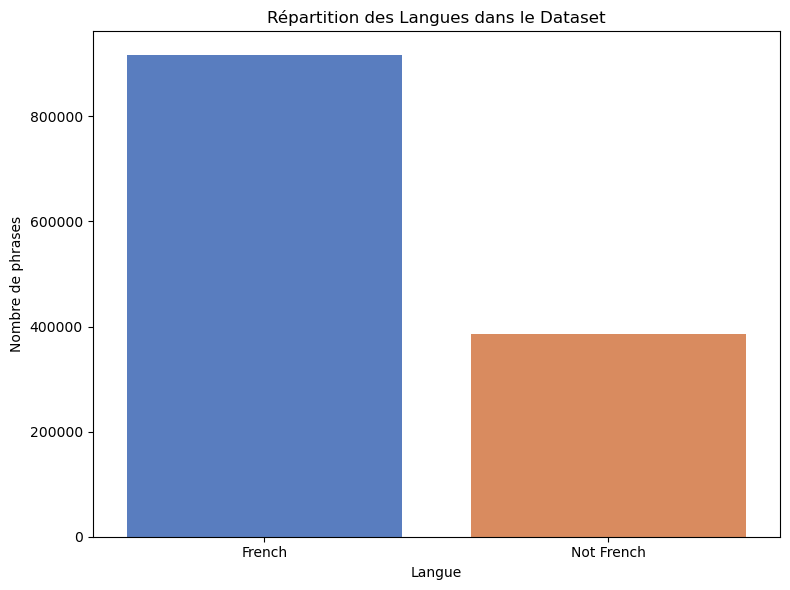

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_language_distribution(data):
    try:
        # Distribution des langues dans le dataset
        plt.figure(figsize=(8, 6))
        sns.countplot(x='language', data=data, palette='muted')
        plt.title("Répartition des Langues dans le Dataset")
        plt.xlabel("Langue")
        plt.ylabel("Nombre de phrases")
        
        # Afficher les résultats en texte
        print("Répartition des Langues dans le Dataset:")
        language_counts = data['language'].value_counts()
        for lang, count in language_counts.items():
            print(f"{lang}: {count} phrases")
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting language distribution: {e}")

# Tracer la répartition des langues
if data is not None:
    plot_language_distribution(data)

Statistiques sur la longueur des phrases :
- Longueur moyenne : 11.5 mots
- Longueur minimale : 1 mots
- Longueur maximale : 286 mots
- Longueur médiane : 11.0 mots


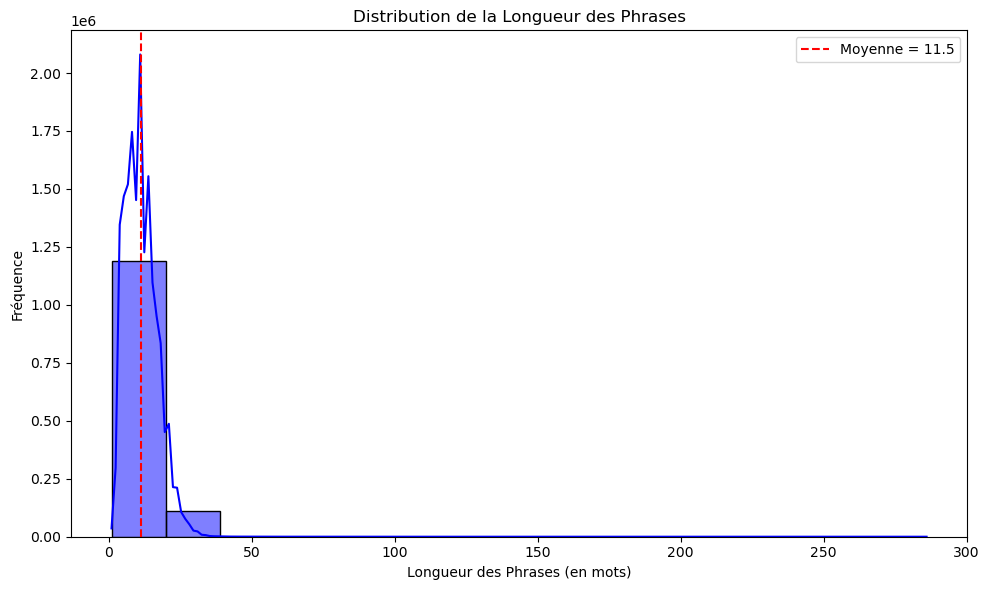

In [5]:
def plot_sentence_length_distribution(data):
    try:
        # Calculer la longueur de chaque phrase
        data['sentence_length'] = data['sentence'].apply(lambda x: len(x.split()))
        
        # Statistiques de longueur des phrases
        avg_length = data['sentence_length'].mean()
        min_length = data['sentence_length'].min()
        max_length = data['sentence_length'].max()
        median_length = data['sentence_length'].median()
        
        print("Statistiques sur la longueur des phrases :")
        print(f"- Longueur moyenne : {avg_length:.1f} mots")
        print(f"- Longueur minimale : {min_length} mots")
        print(f"- Longueur maximale : {max_length} mots")
        print(f"- Longueur médiane : {median_length:.1f} mots")
        
        # Tracer l'histogramme des longueurs des phrases
        plt.figure(figsize=(10, 6))
        sns.histplot(data['sentence_length'], bins=15, kde=True, color='blue')
        plt.title("Distribution de la Longueur des Phrases")
        plt.xlabel("Longueur des Phrases (en mots)")
        plt.ylabel("Fréquence")
        
        plt.axvline(avg_length, color='red', linestyle='--', label=f'Moyenne = {avg_length:.1f}')
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting sentence length distribution: {e}")

# Tracer la distribution des longueurs de phrases
if data is not None:
    plot_sentence_length_distribution(data)

C:\Users\vikne\AppData\Local\Temp\ipykernel_9748\570814533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='sentence_length', data=data, palette='Set2')


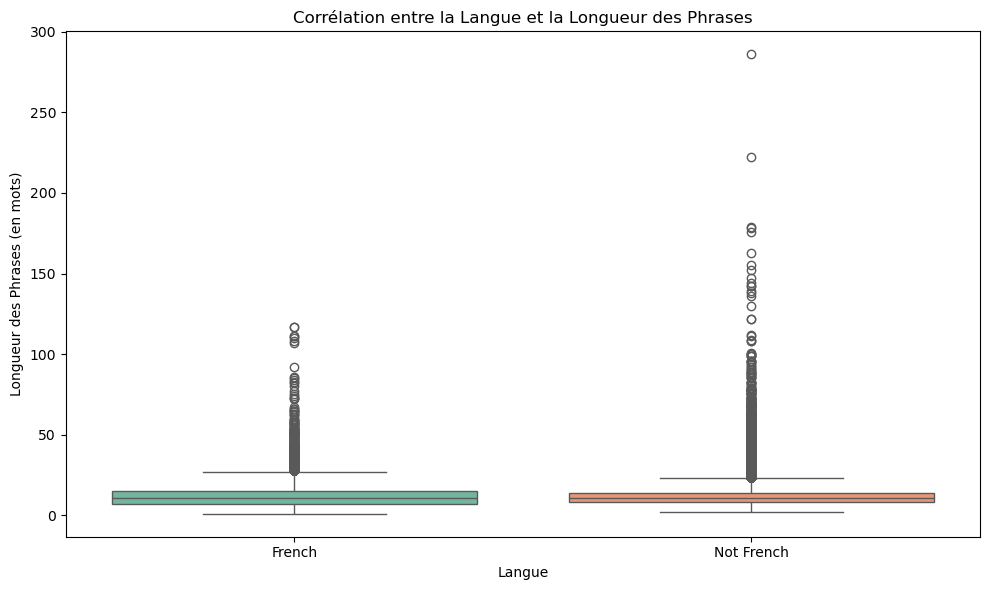

Statistiques pour les phrases en Français :
count    916033.000000
mean         11.464650
std           5.797391
min           1.000000
25%           7.000000
50%          11.000000
75%          15.000000
max         117.000000
Name: sentence_length, dtype: float64
/nStatistiques pour les phrases Non Français :
count    385712.000000
mean         11.429968
std           5.259260
min           2.000000
25%           8.000000
50%          11.000000
75%          14.000000
max         286.000000
Name: sentence_length, dtype: float64


In [6]:
def analyze_correlation(data):
    try:
        # Corrélation entre la longueur des phrases et le label
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='language', y='sentence_length', data=data, palette='Set2')
        plt.title("Corrélation entre la Langue et la Longueur des Phrases")
        plt.xlabel("Langue")
        plt.ylabel("Longueur des Phrases (en mots)")
        plt.tight_layout()
        plt.show()
        
        # Statistiques supplémentaires
        french_stats = data[data['language'] == 'French']['sentence_length'].describe()
        not_french_stats = data[data['language'] == 'Not French']['sentence_length'].describe()
        
        print("Statistiques pour les phrases en Français :")
        print(french_stats)
        print("/nStatistiques pour les phrases Non Français :")
        print(not_french_stats)
        
    except Exception as e:
        print(f"Error analyzing correlation: {e}")

# Analyser la corrélation
if data is not None:
    analyze_correlation(data)